In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
def get_data(filename):
    x = np.genfromtxt(filename, delimiter=',')
    x = x[1:]  # chop the 1st line 
    labels = x[:,0]
    images = x[:,1:].reshape(-1,28,28).astype('float32')
    return images, labels
    

In [3]:

training_images, training_labels = get_data('./sign_mnist/sign_mnist_train.csv')
testing_images, testing_labels = get_data('./sign_mnist/sign_mnist_test.csv')

In [4]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
np.min(testing_labels)
np.max(testing_labels)

24.0

In [6]:
training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range = 40,
                                    width_shift_range = 0.2, 
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow(training_images, training_labels, batch_size = 32)
test_generator = test_datagen.flow(testing_images, testing_labels, batch_size = 32)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [8]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
history = model.fit_generator(train_generator, validation_data = train_generator, steps_per_epoch = len(training_images)//32, epochs=100 )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 857 steps, validate for 858 steps
Epoch 1/100
857/857 [==============================] - 20s 24ms/step - loss: 2.5700 - acc: 0.2118 - val_loss: 1.9904 - val_acc: 0.3765
Epoch 2/100
857/857 [==============================] - 19s 22ms/step - loss: 1.6658 - acc: 0.4617 - val_loss: 1.4120 - val_acc: 0.5343
Epoch 3/100
857/857 [==============================] - 19s 22ms/step - loss: 1.2415 - acc: 0.5915 - val_loss: 1.1280 - val_acc: 0.6154
Epoch 4/100
857/857 [==============================] - 18s 21ms/step - loss: 1.0112 - acc: 0.6659 - val_loss: 0.8916 - val_acc: 0.6967
Epoch 5/100
857/857 [==============================] - 19s 22ms/step - loss: 0.8224 - acc: 0.7248 - val_loss: 0.7390 - val_acc: 0.7522
Epoch 6/100
857/857 [==============================] - 19s 22ms/step - loss: 0.7187 - acc: 0.7619 - val_loss: 0.6148 - val_acc: 0.7947
Epoch 7/100
857/857 

Epoch 58/100
857/857 [==============================] - 19s 22ms/step - loss: 0.1167 - acc: 0.9613 - val_loss: 0.0959 - val_acc: 0.9696
Epoch 59/100
857/857 [==============================] - 18s 21ms/step - loss: 0.1055 - acc: 0.9651 - val_loss: 0.1065 - val_acc: 0.9650
Epoch 60/100
857/857 [==============================] - 18s 21ms/step - loss: 0.1119 - acc: 0.9629 - val_loss: 0.0973 - val_acc: 0.9689
Epoch 61/100
857/857 [==============================] - 19s 23ms/step - loss: 0.1219 - acc: 0.9608 - val_loss: 0.1068 - val_acc: 0.9645
Epoch 62/100
857/857 [==============================] - 19s 22ms/step - loss: 0.1056 - acc: 0.9640 - val_loss: 0.1162 - val_acc: 0.9615
Epoch 63/100
857/857 [==============================] - 19s 22ms/step - loss: 0.1131 - acc: 0.9630 - val_loss: 0.0948 - val_acc: 0.9673
Epoch 64/100
857/857 [==============================] - 18s 22ms/step - loss: 0.1040 - acc: 0.9657 - val_loss: 0.0808 - val_acc: 0.9732
Epoch 65/100
857/857 [==========================

In [13]:
model.evaluate(testing_images/255.0, testing_labels)

7172/7172 [==============================] - 1s 72us/sample - loss: 0.0472 - acc: 0.9837


[0.047201370389900146, 0.98368657]

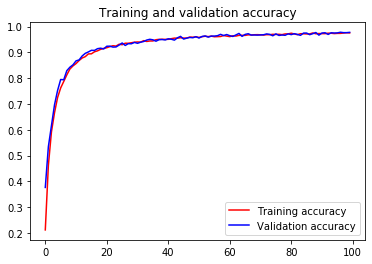

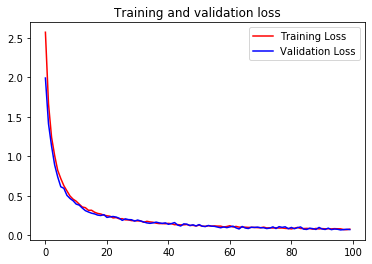

In [14]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
tf.__version__

'2.1.0'